In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
df = pd.read_excel(r"Test_Cases\Clean_airfoil_CST\arrays.xlsx",sheet_name = "Altitude 0m")
dataset = df.to_dict()

In [18]:
plots = ["Cl", "Cd", "Cm"]
plots_dict_index = {plot: list(dataset.keys()).index(plot) for plot in plots}

In [19]:
plot_index = list(plots_dict_index.values())
plots_dict = {}
for i in range(len(plot_index)) :
    if i != len(plot_index) - 1 :
        df0 = df[df.columns[plot_index[i]: plot_index[i+1]]]
        headers = df0.iloc[0]
        df1  = pd.DataFrame(df0.values[1:], columns=headers).reset_index(drop = True).dropna(axis = 1)
        df1.columns = ['AoA'] + ["Mach " + str(e) for e in df1.columns][1:]
        plots_dict[list(plots_dict_index.keys())[i]] = df1.to_dict(orient='list')

    else :
        df0 = df[df.columns[plot_index[i]:]]
        headers = df0.iloc[0]
        df1  = pd.DataFrame(df0.values[1:], columns=headers).reset_index(drop = True).dropna(axis = 1)
        df1.columns = ['AoA'] + ["Mach " + str(e) for e in df1.columns][1:]
        plots_dict[list(plots_dict_index.keys())[i]] = df1.to_dict(orient='list')
plots_dict

{'Cl': {'AoA': [0, 3, 5],
  'Mach 0.21': [0.084654, 0.626721, 0.780797],
  'Mach 0.25': [0.085784, 0.625598, 0.822033]},
 'Cd': {'AoA': [0, 3, 5],
  'Mach 0.21': [0.003856, 0.018709, 0.025123],
  'Mach 0.25': [0.00152, 0.006993, 0.01058]},
 'Cm': {'AoA': [0, 3, 5],
  'Mach 0.21': [0.027858, 0.199584, 0.236659],
  'Mach 0.25': [0.023445, 0.182635, 0.235251]}}

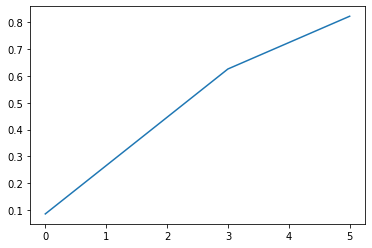

In [20]:
plt.plot(plots_dict["Cl"]["AoA"], plots_dict["Cl"]["Mach 0.25"])

In [15]:
with open("test.txt", 'r') as f:
    lines = f.readlines()
    for i in lines :
        if "sol" in i :
            idx = lines.index(i)
lines[idx-2]

'|1|2|3|\n'

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

['Case_alt10500.00_Mach0.30_AoA0.00', 'Case_alt10500.00_Mach0.30_AoA1.00', 'Case_alt10500.00_Mach0.30_AoA2.00', 'Case_alt10500.00_Mach0.30_AoA3.00', 'Case_alt10500.00_Mach0.30_AoA4.00', 'Case_alt10500.00_Mach0.50_AoA0.00', 'Case_alt10500.00_Mach0.50_AoA1.00', 'Case_alt10500.00_Mach0.50_AoA2.00', 'Case_alt10500.00_Mach0.50_AoA3.00', 'Case_alt10500.00_Mach0.50_AoA4.00', 'Case_alt10500.00_Mach0.60_AoA0.00', 'Case_alt10500.00_Mach0.60_AoA1.00', 'Case_alt10500.00_Mach0.60_AoA2.00', 'Case_alt10500.00_Mach0.60_AoA3.00', 'Case_alt10500.00_Mach0.60_AoA4.00', 'Case_alt10500.00_Mach0.65_AoA0.00', 'Case_alt10500.00_Mach0.65_AoA1.00', 'Case_alt10500.00_Mach0.65_AoA2.00', 'Case_alt10500.00_Mach0.65_AoA3.00', 'Case_alt10500.00_Mach0.65_AoA4.00', 'Case_alt10500.00_Mach0.68_AoA0.00', 'Case_alt10500.00_Mach0.68_AoA1.00', 'Case_alt10500.00_Mach0.68_AoA2.00', 'Case_alt10500.00_Mach0.68_AoA3.00', 'Case_alt10500.00_Mach0.68_AoA4.00', 'Case_alt10500.00_Mach0.70_AoA0.00', 'Case_alt10500.00_Mach0.70_AoA1.00', 

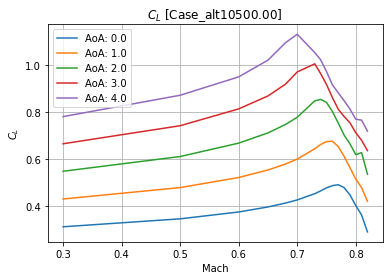

In [24]:
from os import listdir
from os.path import isfile, join
case = "Case_alt10500.00"
path = "Test_Cases\Clean_airfoil_Full"
folders = [f for f in listdir(path) if f.startswith(case)]
print(folders)
AoA = []
CD = []
CL = []
CM = []
Mach = []
for folder in folders :
    filename = path + "\\" + folder + "\\" + "SU2_output.log"
    with open(filename, 'r') as f:
        lines = f.readlines()
        for line in lines :
            if "Solver Exit" in line :
                idx = lines.index(line)
        if "+" in lines[idx - 2] :
            final = lines[idx - 9].split("|")
        else :
            final = lines[idx - 2].split("|")
        print(final)
        CD.append(float(final[-5]))
        CL.append(float(final[-4]))
        CM.append(float(final[-3]))
    Mach.append(float(folder.split("Mach")[1].split("_")[0]))
    AoA.append(float(folder.split("AoA")[1].replace("_", "-")))

df = pd.DataFrame({"Mach": Mach,"AoA": AoA, "CD": CD, "CL": CL}).sort_values("Mach")
for aoa in df["AoA"].unique() :
    plt.plot(df[df["AoA"] == aoa]["Mach"], df[df["AoA"] == aoa]["CL"], label = f"AoA: {aoa}")
    plt.xlabel("Mach")
    plt.ylabel("$C_L$")
    plt.legend()
    plt.grid()
    plt.title(f"$C_L$ [{case}]")

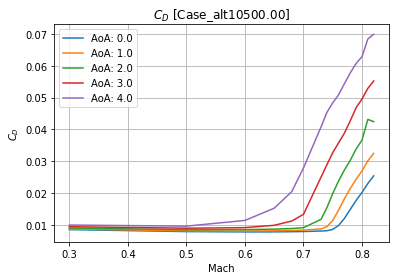

In [25]:
for aoa in df["AoA"].unique() :
    plt.plot(df[df["AoA"] == aoa]["Mach"], df[df["AoA"] == aoa]["CD"], label = f"AoA: {aoa}")
    plt.xlabel("Mach")
    plt.ylabel("$C_D$")
    plt.legend()
    plt.grid()
    plt.title(f"$C_D$ [{case}]")

['Case_alt0.00_Mach0.20_AoA0.00', 'Case_alt0.00_Mach0.20_AoA1.00', 'Case_alt0.00_Mach0.20_AoA10.00', 'Case_alt0.00_Mach0.20_AoA11.00', 'Case_alt0.00_Mach0.20_AoA12.00', 'Case_alt0.00_Mach0.20_AoA13.00', 'Case_alt0.00_Mach0.20_AoA2.00', 'Case_alt0.00_Mach0.20_AoA3.00', 'Case_alt0.00_Mach0.20_AoA4.00', 'Case_alt0.00_Mach0.20_AoA5.00', 'Case_alt0.00_Mach0.20_AoA6.00', 'Case_alt0.00_Mach0.20_AoA7.00', 'Case_alt0.00_Mach0.20_AoA8.00', 'Case_alt0.00_Mach0.20_AoA9.00']


Text(0.5, 1.0, '$C_L$ [Case_alt0.00_Mach0.20]')

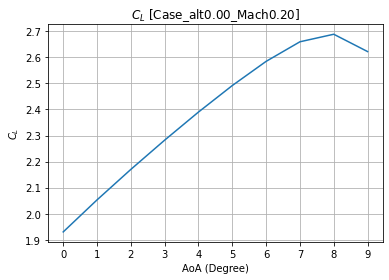

In [8]:
from os import listdir
from os.path import isfile, join
case = "Case_alt0.00_Mach0.20"
path = "Test_Cases\Mesh_and_Run"
folders = [f for f in listdir(path) if f.startswith(case)]
print(folders)
AoA = []
CD = []
CL = []
CM = []
Mach = []
for folder in folders :
    filename = path + "\\" + folder + "\\" + "SU2_output.log"
    with open(filename, 'r') as f:
        lines = f.readlines()
        for line in lines :
            if "Solver Exit" in line :
                idx = lines.index(line)
        final = lines[idx - 2].split("|")
        # print(final)
        CD.append(float(final[-5]))
        CL.append(float(final[-4]))
        CM.append(float(final[-3]))
    Mach.append(float(folder.split("Mach")[1].split("_")[0]))
    AoA.append(float(folder.split("AoA")[1].replace("_", "-")))
df = pd.DataFrame({"Mach": Mach,"AoA": AoA, "CD": CD, "CL": CL}).sort_values("AoA")
df_plot = df[df["AoA"] < 10]
plt.plot(df_plot["AoA"], df_plot["CL"])
plt.xlabel("AoA (Degree)")
plt.xticks(range(0, 10,1))
plt.ylabel("$C_L$")
plt.grid()
plt.title(f"$C_L$ [{case}]")

Text(0.5, 1.0, '$C_D$ [Case_alt0.00_Mach0.20]')

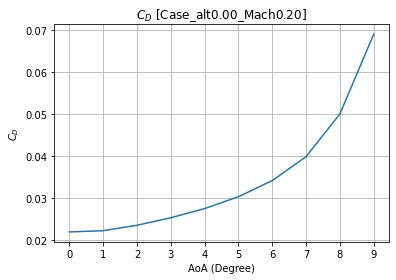

In [9]:
plt.plot(df_plot["AoA"], df_plot["CD"])
plt.xlabel("AoA (Degree)")
plt.xticks(range(0, 10,1))
plt.ylabel("$C_D$")
plt.grid()
plt.title(f"$C_D$ [{case}]")

Text(0.5, 1.0, '$C_L$ vs $C_D$ [Case_alt10500.00]')

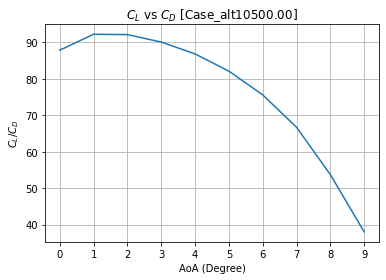

In [18]:
CLvsCD = df_plot["CL"]/df_plot["CD"]
plt.plot(df_plot["AoA"], CLvsCD)
plt.xlabel("AoA (Degree)")
plt.xticks(range(0, 10,1))
plt.ylabel("$C_L/C_D$")
plt.grid()
plt.title(f"$C_L$ vs $C_D$ [{case}]")